##<h2>**DATA EXPLORATION**</h2>

1. Explore this dataset using what you have learned in data preprocessing and data visualization 

In [ ]:
import numpy as np 
import pandas as pd 
house=pd.read_csv("/content/house.csv")
house.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [ ]:
house.shape

(21613, 21)

In [ ]:
house.dtypes

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [ ]:
house.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [ ]:
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [ ]:
house.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


##<h2>**DATA CLEANING**</h2>

In [ ]:
unique_ids = len(set(house.id))
total_ids = house.shape[0]
print("There are " + str(total_ids - unique_ids) + " duplicate Ids in the train dataset.")

There are 177 duplicate Ids in the train dataset.


In [ ]:
house.drop_duplicates(subset="id", keep = 'first', inplace=True)

In [ ]:
house.shape

(21436, 21)

In [ ]:
unique_ids = len(set(house.id))
total_ids = house.shape[0]
print("There are " + str(total_ids - unique_ids) + " duplicate Ids in the train dataset.")

There are 0 duplicate Ids in the train dataset.


In [ ]:
from datetime import datetime
house['date']= pd.to_datetime(house['date'])

In [ ]:
house.isnull().sum().sum()

0

##<h2>**FEATURES ENGENIERING**</h2>

In [ ]:
house.drop(["id","date","yr_built","yr_renovated","zipcode","lat","waterfront","condition","long","sqft_lot15"],axis=1,inplace=True)
house.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,grade,sqft_above,sqft_basement,sqft_living15
0,221900.0,3,1.00,1180,5650,1.0,0,7,1180,0,1340
1,538000.0,3,2.25,2570,7242,2.0,0,7,2170,400,1690
2,180000.0,2,1.00,770,10000,1.0,0,6,770,0,2720
3,604000.0,4,3.00,1960,5000,1.0,0,7,1050,910,1360
4,510000.0,3,2.00,1680,8080,1.0,0,8,1680,0,1800


 ## <h2>**DATA SCALING**</h2>

In [ ]:
house["price"].describe()

count    2.143600e+04
mean     5.405293e+05
std      3.676893e+05
min      7.500000e+04
25%      3.221500e+05
50%      4.500000e+05
75%      6.450000e+05
max      7.700000e+06
Name: price, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


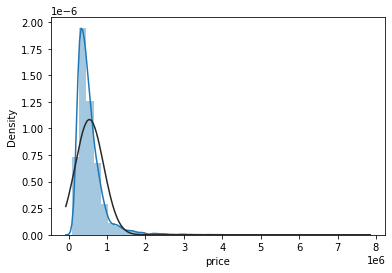

In [ ]:
import seaborn as sns 
from scipy.stats import norm, skew
import matplotlib.pyplot as plt

sns.distplot(house["price"], bins=  40, fit=norm)
plt.show()

we notice a right skewness( the distribution is spread on the right)

In [ ]:
print(house["price"].skew())

4.0284877846766


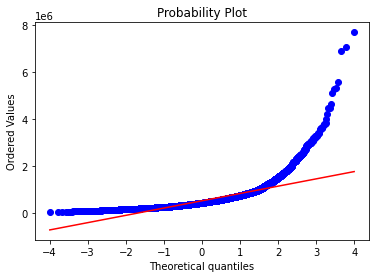

In [ ]:
from scipy import stats
stats.probplot(house["price"], plot=plt)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


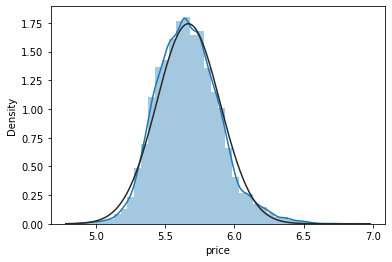

In [ ]:
house["price"] = np.log10(house["price"])
sns.distplot(house["price"], bins=  40, fit=norm)
plt.show()

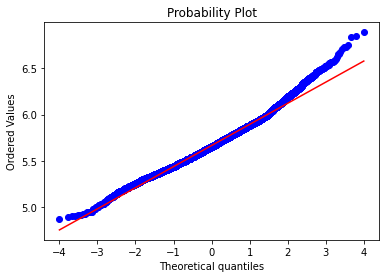

In [ ]:
stats.probplot(house["price"], plot=plt)
plt.show()

##<h2>**DATA VISUALIZATION**</h2>

In [ ]:
sns.countplot(house.bedrooms,order=house.bedrooms.value_counts().index)

NameError: ignored

In [ ]:
sns.countplot(house.bathrooms,order=house.bathrooms.value_counts().index)

In [ ]:
sns.countplot(house.floors,order=house.floors.value_counts().index);
plt.title("Number of Floors")

In [ ]:
from collections import Counter
sns.barplot(list(Counter(house.grade).keys()),list(Counter(house.grade).values()));
plt.xlabel("Grade");
plt.ylabel("Count of Grades");
plt.title("Types of Grades")

In [ ]:
sns.boxplot(house.price)

In [ ]:
plt.scatter(x='grade',y='price',data=house)

In [ ]:
def plot_correlation_map( df ):

    corr = df.corr()

    s , ax = plt.subplots( figsize =( 12 , 10 ) )

    cmap = sns.diverging_palette( 220 , 10 , as_cmap = True )

    s = sns.heatmap(

        corr, 

        cmap = cmap,

        square=True, 

        cbar_kws={ 'shrink' : .9 }, 

        ax=ax, 

        annot = True, 

        annot_kws = { 'fontsize' : 12 }

        )

In [ ]:
plot_correlation_map(house)

##<h2>**MACHINE LEARNING**</h2>

**FEATURES SELECTION**

2. Write a paragraph selecting the most important features (feature selection):

I select a feature where its correlation with the price is large (0.7) which is sqft_living and decide to apply the linear regression


In [ ]:
from sklearn.preprocessing import StandardScaler
x = house.iloc[:,3:4]
sn = StandardScaler()
x = sn.fit_transform(x)
y= house.iloc[:,0:1]

**SPLIT DATA** 

3. Split your dataset into a training set and a testing set. 

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.1, random_state = 100)

**LINEAR REGRESSION**

4. Apply Linear regression to your training set. 

In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train, y_train)
predicted=model.predict(x_test) 

5. Plot the linear regression. 

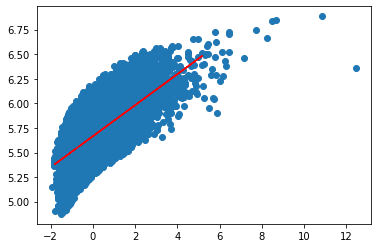

In [ ]:
plt.scatter(x,y)
plt.plot(x_test,predicted , color='red')

5. Measure the performance of linear regression using the testing set. 

In [ ]:
from sklearn import metrics
print("MSE=", metrics.mean_squared_error(y_test,predicted))
print("R squared=", metrics.r2_score(y_test,predicted))

MSE= 0.026168744104247844
R squared= 0.5138563012158277


**MULTI_LINEAR REGRESSION**

6. Apply multi-linear regression and compare it to the linear model. 

In [ ]:
x = house[["sqft_living","sqft_above","bedrooms","bathrooms"]]
sn = StandardScaler()
x = sn.fit_transform(x)
y= house["price"]

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.1, random_state = 100)

In [ ]:
model = LinearRegression()
model.fit(x_train, y_train)
predicted=model.predict(x_test) 

In [ ]:
print("MSE=",metrics.mean_squared_error(y_test,predicted))
print("R squared=", metrics.r2_score(y_test,predicted))

MSE= 0.025963003513404085
R squared= 0.5176783987312599


the linear model and the multi_linear model give us roughly the same precision rate, we therefore conclude that the two algorithms have the same efficiency

**POLYNOMIAL REGRESSION**

7. Apply Polynomial regression and compare it to the linear and multilinear regression. 

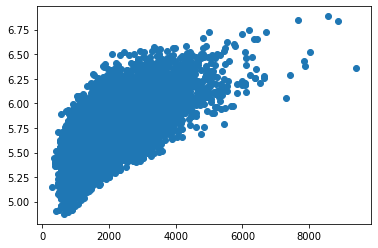

In [ ]:
plt.scatter(house["sqft_above"],house["price"])
plt.show()

In [ ]:
x3 = house.iloc[:,7:8]
sn = StandardScaler()
x3 = sn.fit_transform(x3)
y= house.iloc[:,0:1].values

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x3, y, test_size = 0.1, random_state = 100)

In [ ]:
from sklearn.preprocessing import PolynomialFeatures 
model = LinearRegression()
model.fit(x_train, y_train)
poly = PolynomialFeatures(degree = 3) 
x_poly = poly.fit_transform(x3)   
poly.fit(x_poly, y) 
model.fit(x_poly, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

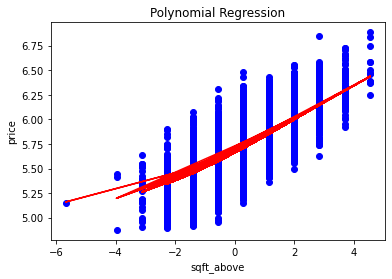

In [ ]:
plt.scatter(x3, y, color = 'blue') 
  
plt.plot(x3, model.predict(poly.fit_transform(x3)), color = 'red') 
plt.title('Polynomial Regression') 
plt.xlabel('sqft_above') 
plt.ylabel('price')   
plt.show() 

In [ ]:
predicted=model.predict(poly.fit_transform(x_test))
print("MSE: ", metrics.mean_squared_error(y_test, predicted))
print("R squared: ", metrics.r2_score(y_test,predicted))

MSE:  0.026558775652740015
R squared:  0.5066105817089552


the polynomial regression model has a low accuracy rate, so we conclude that it is not really suitable for our data. linear and multi_linear regression are two more efficient algorithms for our dataset